# Research Skills: Image Analysis
## Worksheet 6 : Image Segmentation 2

Sharon Ong, Department of Cognitive Science and Artificial Intelligence - Tilburg University

In the session, we will learn more segmentation algorithms including
* Superpixels 
* Graph Cuts

In addition, we will learn how to implement template matching. 

In [26]:
from skimage import data, io, segmentation, color
from skimage.util import img_as_float, img_as_ubyte
from skimage.filters import sobel
from skimage.future import graph
from matplotlib import pyplot as plt
from skimage.feature import match_template
import numpy as np
from scipy import signal
import matplotlib.patches as mpatches 
#from skimage.util import pad
from skimage.measure import label

# 1. Superpixels 
Superpixel is a group of connected pixels with similar colors or gray levels. Superpixel segmentation is dividing an image into hundreds of non-overlapping superpixels. The following code compares two superpixl segmentation techniques; the Felzenszwalb algorithm and the SLIC algorithm. 

Felzenszwalb: number of segments: 200
Slic: number of segments: 81


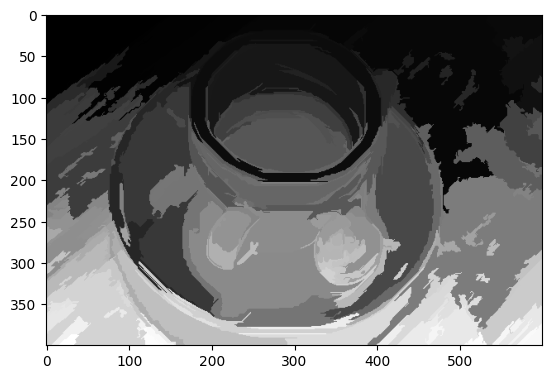

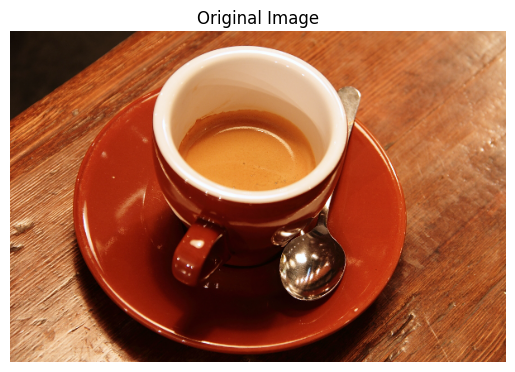

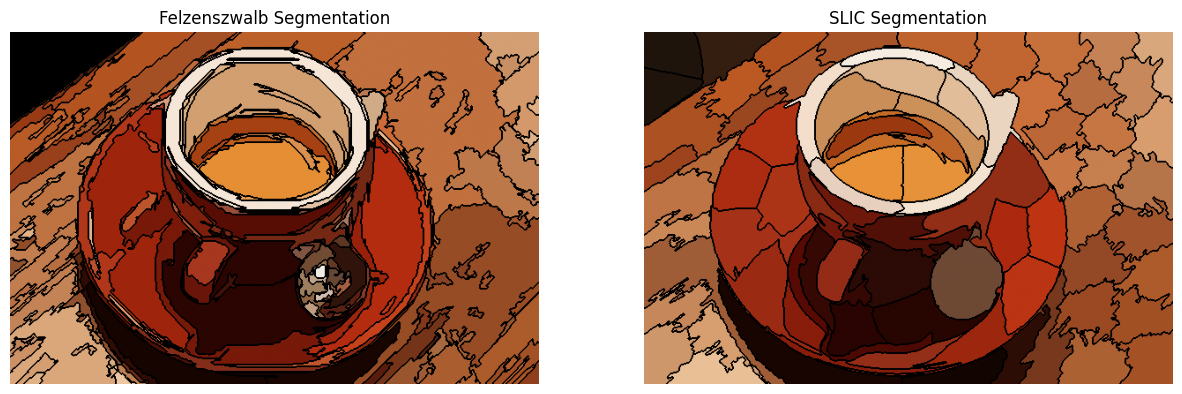

In [21]:
im = data.coffee()
#im = img_as_float(io.imread('images\\sunflower.tif'))
segments_fz1 = segmentation.felzenszwalb(im, scale=100, sigma=1, min_size=100)
segments_slic1 = segmentation.slic(im, n_segments=100, compactness=10, sigma=1, start_label=1)

# add 1 to avoid labels with 0
#segments_fz1 = segments_fz1+1 
#segments_slic1 = segments_slic1 + 1 
plt.figure()
plt.imshow(segments_fz1,cmap='gray')
label_rgb1 = color.label2rgb(segments_fz1, im, kind='avg',bg_label=0)
label_rgb1 = segmentation.mark_boundaries(label_rgb1, segments_fz1, (0, 0, 0),mode='thick')

plt.figure()
plt.imshow(im), plt.axis('off'), plt.title('Original Image')

plt.figure(figsize=(15,8))

plt.subplot(121)
plt.imshow(label_rgb1), plt.axis('off'), plt.title('Felzenszwalb Segmentation')

label_rgb2 = color.label2rgb(segments_slic1, im, kind='avg',bg_label=0)
label_rgb2 = segmentation.mark_boundaries(label_rgb2, segments_slic1, (0, 0, 0),mode='thick')

plt.subplot(122)
plt.imshow(label_rgb2), plt.axis('off'), plt.title('SLIC Segmentation')

print(f"Felzenszwalb: number of segments: {len(np.unique(segments_fz1))}")

print(f"Slic: number of segments: {len(np.unique(segments_slic1))}")



Using for loops,
1. vary the min_size (e.g values of 50, 100 and 500 pixels) and sigma parameters (e.g. sigma = 0.25, 1, 5) for Felzenszwalb segmentation 
2. vary the min_size (e.g n_segments from 50, 100 to 500 pixels), sigma parameters (e.g. sigma = 0.25, 1, 5)  and compactness (e.g compactness = 10 and 20) for SLIC segmentation 
3. display your results in subplots. 

Run your code with another image of your choice. 

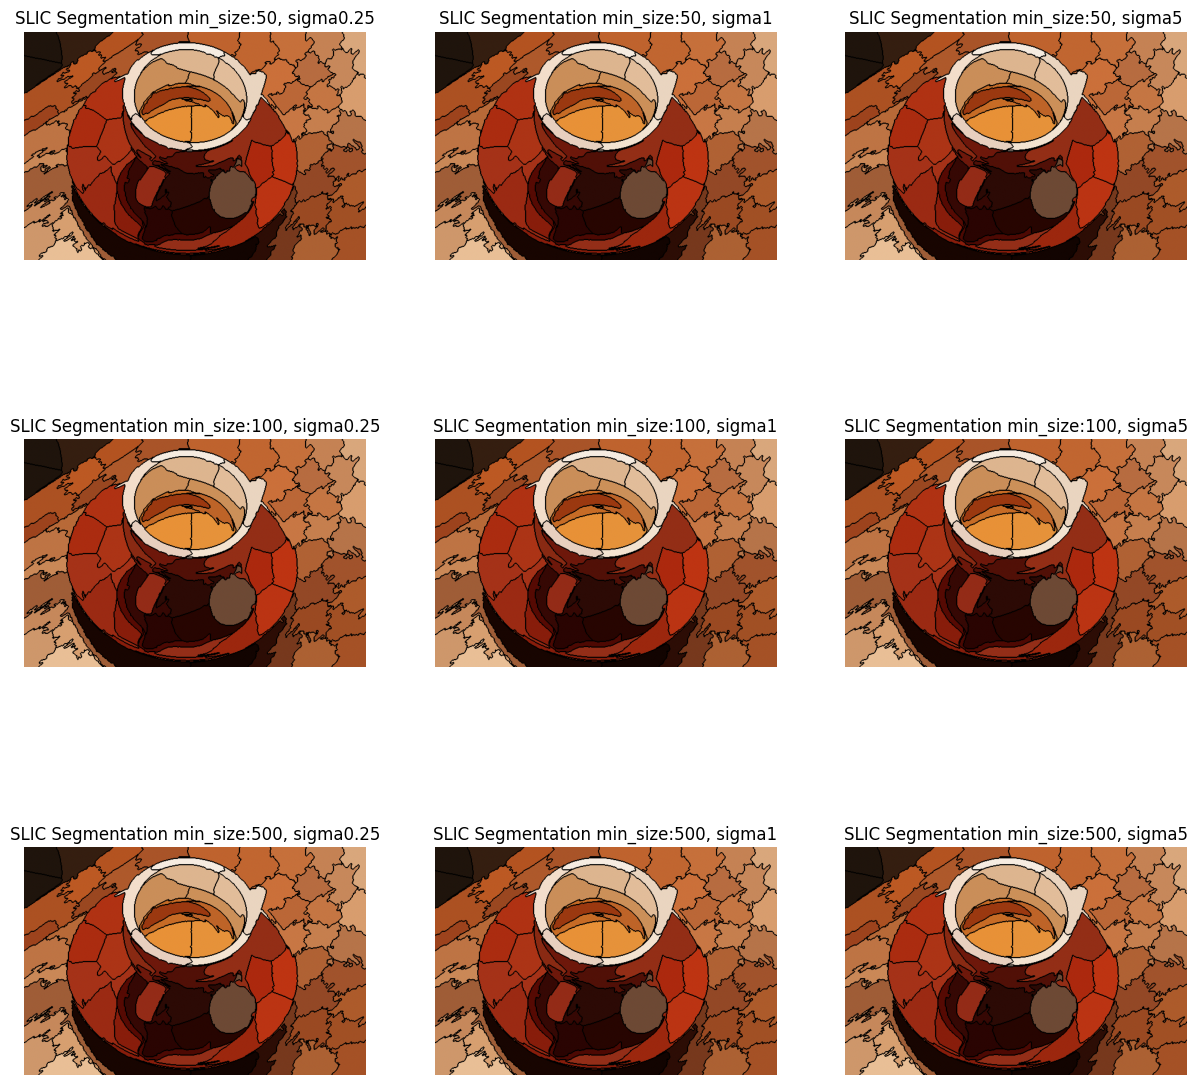

In [23]:

#
# Your code goes here 
# 


min_size = [50, 100, 500]
sigma = [0.25, 1, 5]
plt.figure(figsize=(15,15))
counter = 1
for i in min_size:
    for j in sigma:
        segments_fz1 = segmentation.felzenszwalb(im, scale=100, sigma=j, min_size=i)

        label_rgb1 = color.label2rgb(segments_fz1, im, kind='avg',bg_label=0)
        label_rgb1 = segmentation.mark_boundaries(label_rgb2, segments_fz1, (0, 0, 0),mode='thick')

        plt.subplot(3,3,counter)
        plt.imshow(label_rgb2), plt.axis('off'), plt.title(f'SLIC Segmentation min_size:{i}, sigma:{j}')

        counter += 1


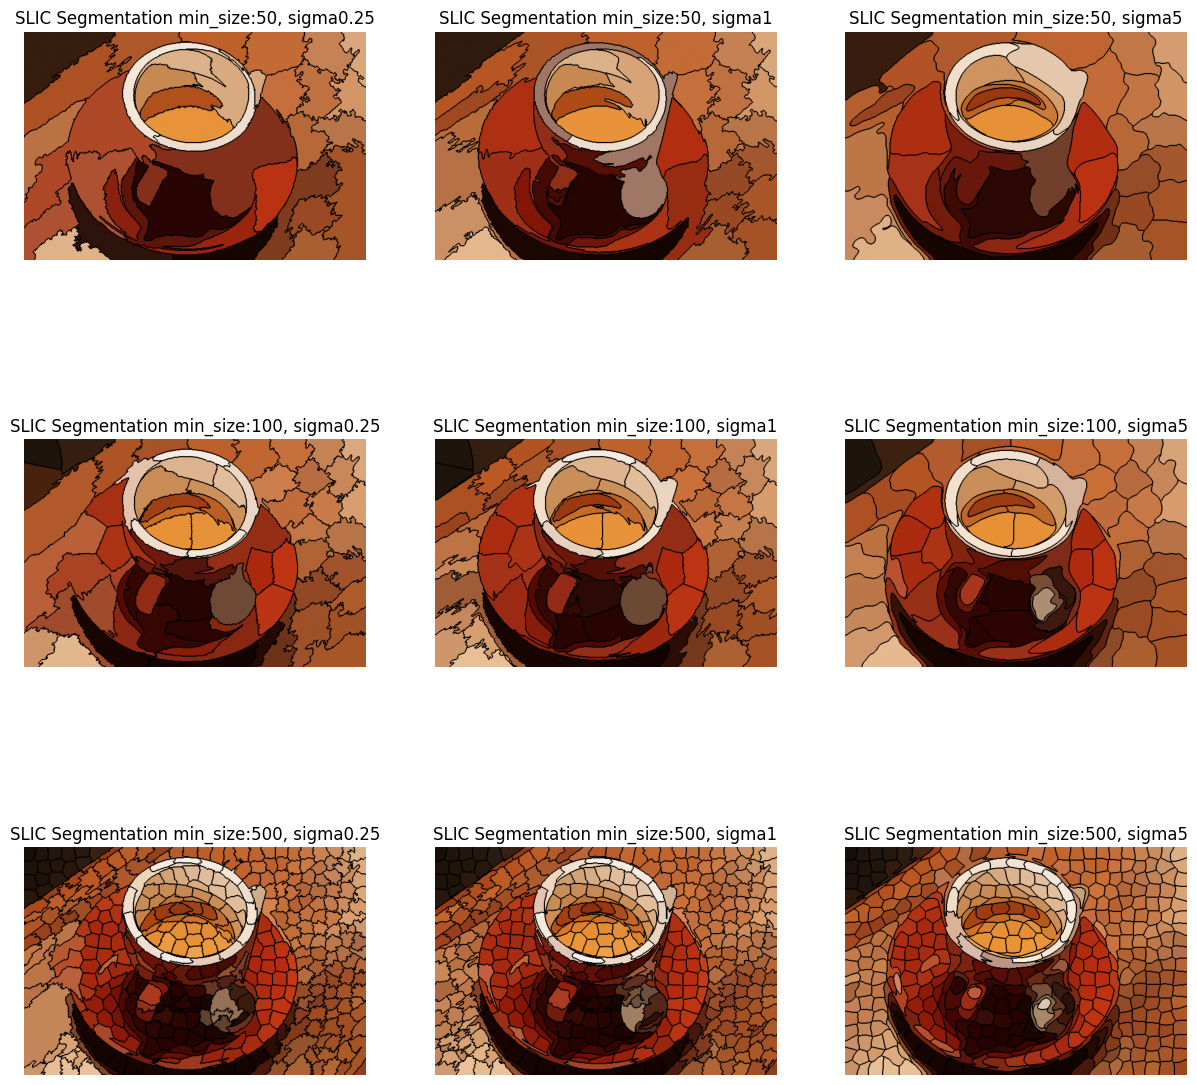

In [24]:

#
# Your code goes here 
# 

min_size = [50, 100, 500]
sigma = [0.25, 1, 5]
plt.figure(figsize=(15,15))
counter = 1
for i in min_size:
    for j in sigma:
        segments_slic1 = segmentation.slic(im, n_segments=i, compactness=10, sigma=j, start_label=1)

        label_rgb2 = color.label2rgb(segments_slic1, im, kind='avg',bg_label=0)
        label_rgb2 = segmentation.mark_boundaries(label_rgb2, segments_slic1, (0, 0, 0),mode='thick')

        plt.subplot(3,3,counter)
        plt.imshow(label_rgb2), plt.axis('off'), plt.title(f'SLIC Segmentation min_size:{i}, sigma:{j}')

        counter += 1


# 2. Graph cuts 

This example constructs a Region Adjacency Graph (RAG) and recursively performs a Normalized Cut on it.

In [28]:
# !pip install --upgrade --force-reinstall  network

^C


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for network: filename=network-0.1-py3-none-any.whl size=3137 sha256=dfd3db5f01c8c3393673ffc20bac4550d752b9ffa873e2c2bf7217e5c6038f32
  Stored in directory: c:\users\tobi1\appdata\local\pip\cache\wheels\8d\e7\2f\bdae2118485d854221659a8fd5fe4960cb17c21fae86d51b3e
Successfully built network


In [29]:
img = data.coffee()

segments_slic1 = segmentation.slic(img, compactness=30, n_segments=400, start_label=1)
img1 = color.label2rgb(segments_slic1, img, kind='avg', bg_label=0)
label_slic1 = segmentation.mark_boundaries(img1, segments_slic1, (0, 0, 0),mode='thick')


# creating a Region Adjancy Graph 
g = graph.rag_mean_color(img, segments_slic1, mode='similarity')

# perform a normalized cut with a threshold of 0.001
segments_gc1 = graph.cut_normalized(segments_slic1, g, thresh=0.001)
label_gc1 = color.label2rgb(segments_gc1, img, kind='avg', bg_label=0)
label_gc1 = segmentation.mark_boundaries(img1, segments_gc1, (0, 0, 0),mode='thick')
print(f"Slic: number of segments: {len(np.unique(segments_slic1))}")

print(f"Normalized cuts: number of segments: {len(np.unique(segments_gc1))}")

plt.figure()
plt.imshow(label_slic1), plt.axis('off'), plt.title('SLIC Segmentation')

plt.figure()
plt.imshow(label_gc1)
plt.axis('off'),  plt.axis('off'), plt.title('Normalized Cuts ')

#increase theshold = more cuts


AttributeError: module 'networkx' has no attribute 'to_scipy_sparse_matrix'

Using a for loop, find the number of segments when the threshold (thresh) = 0.0001, 0.01. and 0.1  Display your results. 

In [5]:
threshold = [0.0001, 0.01, 0,1]


counter = 1
plt.figure(figsize=(8,8))
for t in threshold:
    segments_gc1 = graph.cut_normalized(segments_slic1, g, thresh=t)
    label_gc1 = color.label2rgb(segments_gc1, img, kind='avg', bg_label=0)
    label_gc1 = segmentation.mark_boundaries(img1, segments_gc1, (0, 0, 0),mode='thick')

    print(f"Normalized cuts: number of segments: {len(np.unique(segments_gc1))}")

    plt.subplots(1,3, counter)
    plt.figure()
    plt.imshow(label_gc1)
    plt.axis('off'),  plt.axis('off'), plt.title('Normalized Cuts ')

    counter += 1



AttributeError: module 'networkx' has no attribute 'to_scipy_sparse_matrix'

<Figure size 800x800 with 0 Axes>

# 3 .Template Matching 
The following example compares a correlation and normalized correlation for template matching. 

In [7]:

im = img_as_float(io.imread('images/circuitboard.tif')) #
template_im = img_as_float(io.imread('images/circuitboard-connector.tif'))

# correlation 
correlation = signal.correlate2d(im, template_im,boundary='symm', mode='full')
# find the coordinates with best correlation score 
ij = np.unravel_index(np.argmax(correlation), correlation.shape) 
xc, yc = ij[::-1]
# normalized correlation
ncc = match_template(im, template_im)
# find the coordinates with best normalized correlation score 
ij = np.unravel_index(np.argmax(ncc), ncc.shape)
xncc, yncc = ij[::-1]

# brighter image does not give you higher score !!!

In [13]:
print(im.shape, ncc.shape)

(915, 948) (704, 895)


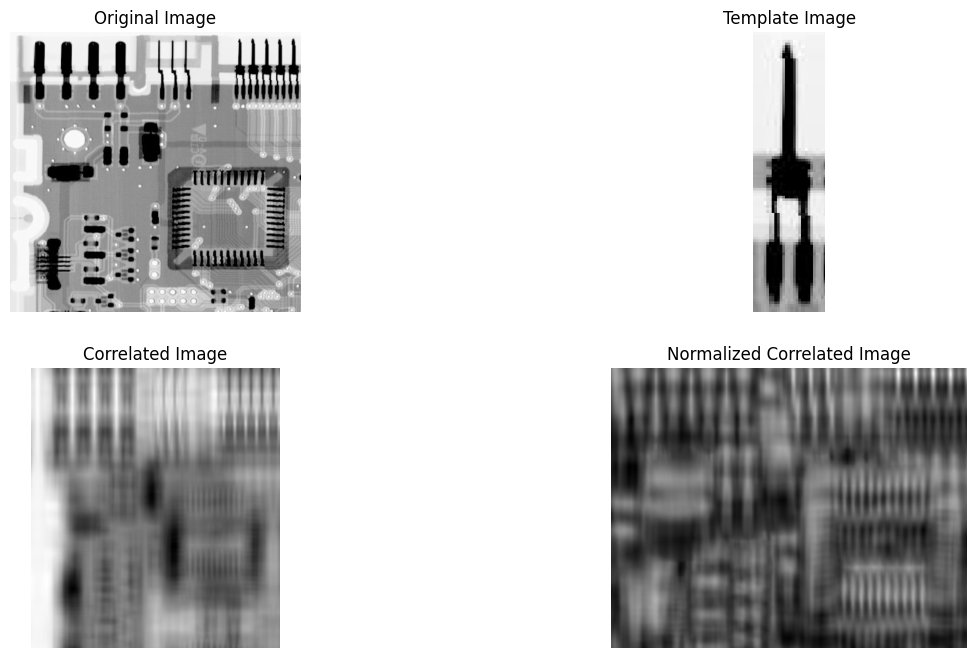

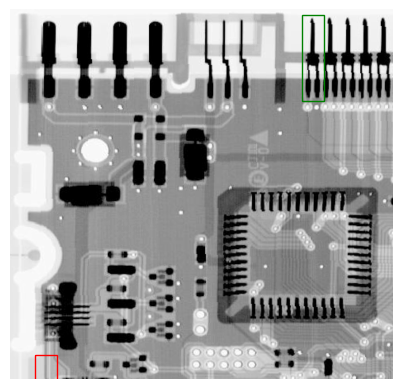

In [8]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1), 
plt.imshow(im,cmap='gray'), plt.axis('off'), plt.title('Original Image')

plt.subplot(2,2,2), 
plt.imshow(template_im,cmap='gray'), plt.axis('off'), plt.title('Template Image')

plt.subplot(2,2,3), 
plt.imshow(correlation,cmap='gray'), plt.axis('off'), plt.title('Correlated Image')

plt.subplot(2,2,4), 
plt.imshow(ncc,cmap='gray'), plt.axis('off'), plt.title('Normalized Correlated Image')


plt.figure()
ax1 = plt.subplot(1,1, 1)
ax1.imshow(im,cmap='gray')
ax1.set_axis_off()
ht, wt = template_im.shape
rect = plt.Rectangle((xc, yc), wt, ht, edgecolor='r', facecolor='none')
ax1.add_patch(rect)
rect = plt.Rectangle((xncc, yncc), wt, ht, edgecolor='g', facecolor='none')
ax1.add_patch(rect)


# Advanced Level
# 4 Detecting Multiple Objects with Template Matching 

There are five circuit board connectors in the image "circuitboard.tif" and draw bouding boxes on all five of them.
Hint: check the size of the image from the output of match template and the original image. 

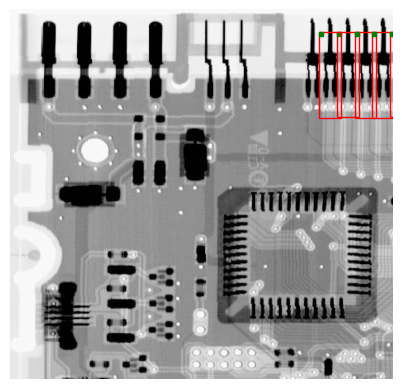

In [46]:
#
# Your code goes here.
#
from skimage.measure import label, regionprops, regionprops_table

im = img_as_float(io.imread('images/circuitboard.tif')) #
template_im = img_as_float(io.imread('images/circuitboard-connector.tif'))

im_pad = np.lib.pad(im, np.int32(0.8*template_im.shape[1]), 'edge')

ncc = match_template(im_pad, template_im)

nccBW = ncc > 0.7*ncc.max()

label_img = label(nccBW)
props = regionprops(label_img)


plt.figure()
ax1 = plt.subplot(1,1, 1)
ax1.imshow(im,cmap='gray')
ax1.set_axis_off()
ht, wt = template_im.shape
for region in props:
    y0, x0 = region.centroid

    rect = plt.Rectangle((x0, y0), wt, ht, edgecolor='r', facecolor='none')
    ax1.add_patch(rect)
    rect2 = plt.Rectangle((x0, y0), 10, 10, edgecolor='g', facecolor='g')
    ax1.add_patch(rect2)